In [1]:
cd ../task_01/pipelines

/home/tristan/Documents/ethz/master/second_year/first_semester/dsl/data_sc_lab/task_01/pipelines


In [2]:
from ipynb.fs.full.tool_functions import *

/home/tristan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [3]:
df_beha = pd.read_csv('../../../data/Behavioral/AllData.csv')

# df_psd_cluster = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Cluster.csv") 
# df_psd_channel = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Channel.csv") 
# df_spectro_cluster = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Cluster.csv")
# df_spectro_channel = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Channel.csv")

# df_microstate = pd.read_csv("../../../data/EEG/RestingEEG_Microstates.csv")

/home/tristan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1

# What are the different diseases?

In [15]:
array_elements = np.asarray(df_beha[["DX_01"]]).flatten()
to_string = lambda t: str(t)

array_elements_str = np.array([to_string(xi) for xi in array_elements])

y_id_label_adhd = df_beha[df_beha["DX_01"].str.contains("ADHD") == True]
y_id_label_adhd[["Age", "DX_01", "Patient_ID"]]

,Age,DX_01,Patient_ID
2,10.052589,ADHD-Combined Type,NDARRM363BXZ
8,17.203855,ADHD-Combined Type,NDARED632KNG
23,7.987451,ADHD-Hyperactive/Impulsive Type,NDARUY876VL1
29,11.267396,ADHD-Inattentive Type,NDAREY721PVD
31,11.979123,ADHD-Inattentive Type,NDARAX573RMT
...,...,...,...
2077,13.847022,ADHD-Combined Type,NDARKK597VDH
2083,16.456194,ADHD-Combined Type,NDARCL008HLA
2084,16.119438,ADHD-Inattentive Type,NDARYM334BZ5
2086,10.203057,ADHD-Combined Type,NDARJX939UCQ


# Statistical difference?

In [5]:
# Extract relevant info from the Behavioral data 
y_labels = df_beha[["Patient_ID", "Age", "DX_01_Cat"]]
y_labels_healthy = y_labels[y_labels["DX_01_Cat"].str.contains("No Diagnosis Given") == True]
y_labels_unhealthy = y_labels[y_labels["DX_01_Cat"].str.contains("No Diagnosis Given") == False]


y_labels = y_labels[["Patient_ID", "Age"]]
y_labels_healthy = y_labels_healthy[["Patient_ID", "Age"]]
y_labels_unhealthy = y_labels_unhealthy[["Patient_ID", "Age"]]
y_labels_unhealthy

,Patient_ID,Age
0,NDARYM832PX3,7.048254
1,NDARNJ687DMC,6.348163
2,NDARRM363BXZ,10.052589
3,NDARUW586LLL,12.319415
4,NDARDC298NW4,13.901437
...,...,...
2086,NDARJX939UCQ,10.203057
2087,NDARJJ817UP1,9.126397
2091,NDARYZ986HEW,7.563084
2092,NDARPM572ZZV,9.832762


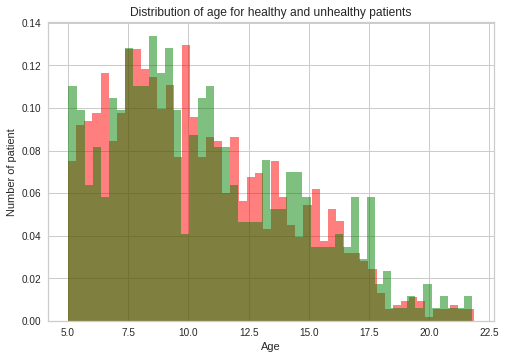

In [7]:
import matplotlib.pyplot as plt
plt.hist(np.asarray(y_labels_unhealthy[['Age']]).flatten(), 50, facecolor='red',density=True, alpha=0.5)
plt.hist(np.asarray(y_labels_healthy[['Age']]).flatten(), 50, facecolor='green', density=True, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Number of patient')
plt.title('Distribution of age for healthy and unhealthy patients')
plt.show()